In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('yield_df.csv')

In [ ]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.shape

(25932, 7)

In [ ]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
df.duplicated().sum()

2310

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


**Transforming average_rain_fall_mm_per_year**

In [ ]:
df['average_rain_fall_mm_per_year'].info()

<class 'pandas.core.series.Series'>
Index: 25932 entries, 0 to 28241
Series name: average_rain_fall_mm_per_year
Non-Null Count  Dtype  
--------------  -----  
25932 non-null  float64
dtypes: float64(1)
memory usage: 405.2 KB


In [ ]:
## return true if it is string
def isStr(obj):
  try:
    float(obj)
    return False
  except :
    return True

In [ ]:
to_drop=df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [ ]:
df.drop(to_drop, inplace=True)

In [ ]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


**Visualization**

<Axes: xlabel='count', ylabel='Area'>

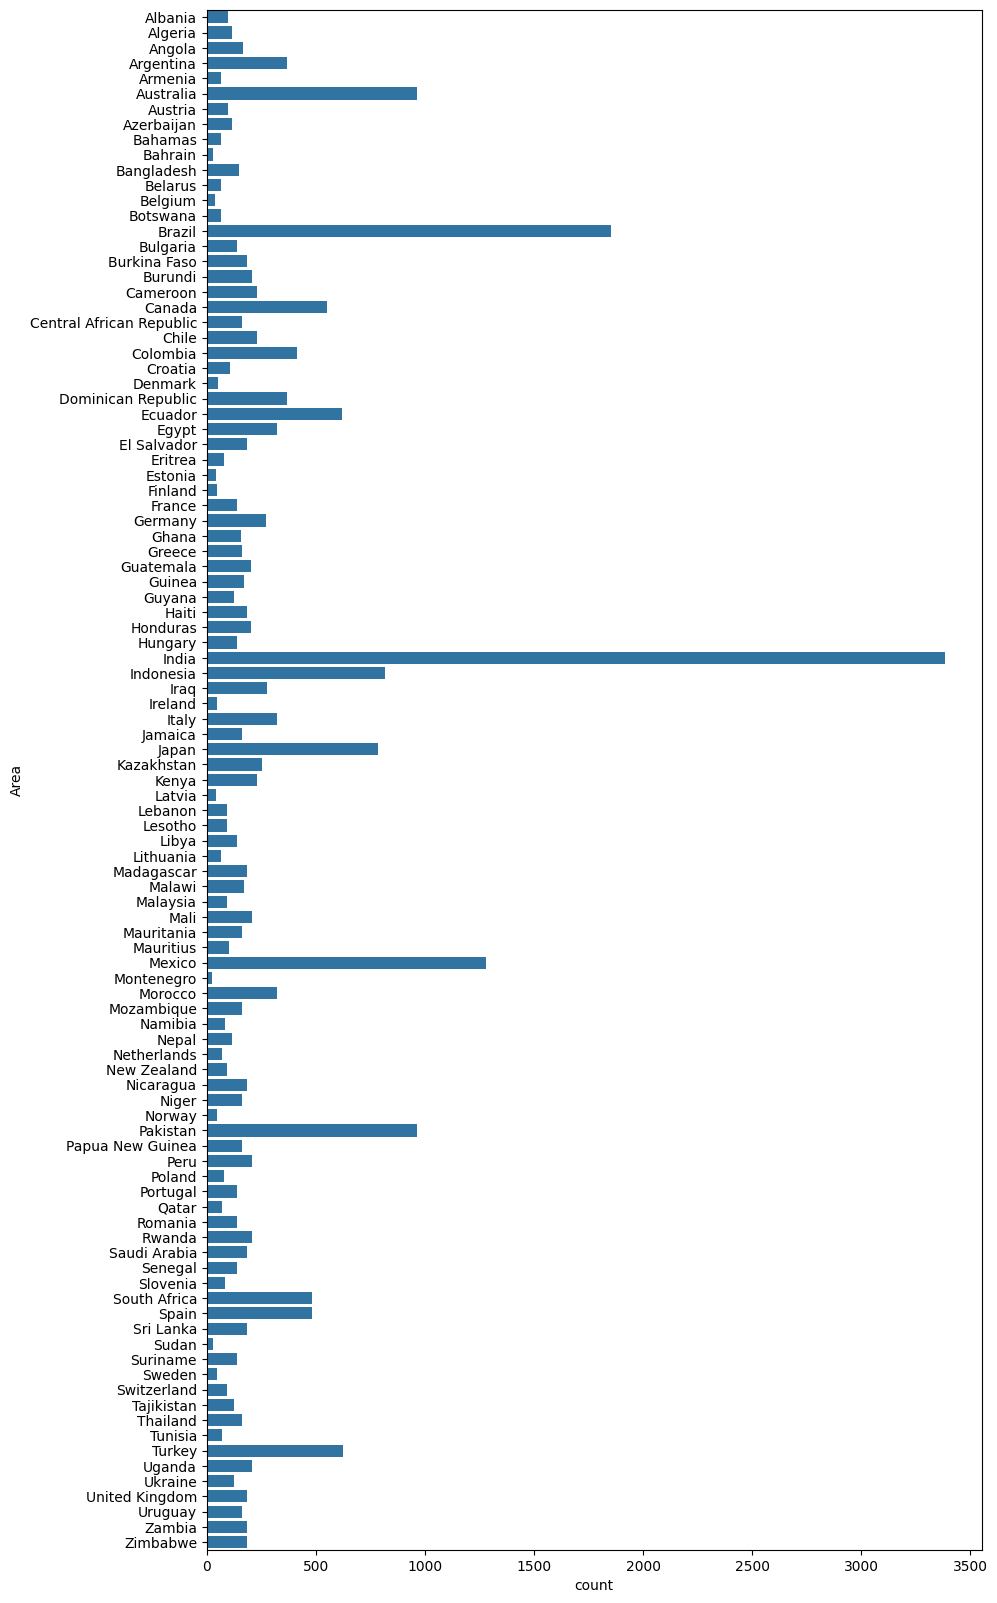

In [ ]:
plt.figure(figsize=(10,20))
sns.countplot(y=df.Area)

****

**Area Wise Yield**

In [ ]:
total_yield_area_wise = df.groupby('Area')['hg/ha_yield'].sum()

In [ ]:
print(total_yield_area_wise)

Area
Albania            5711536
Algeria            6711464
Angola             5722563
Argentina         32864032
Armenia            4524100
                    ...   
Ukraine            5496901
United Kingdom    44335992
Uruguay            9539820
Zambia             7254311
Zimbabwe           7408629
Name: hg/ha_yield, Length: 101, dtype: int64


In [ ]:
county=df['Area'].unique()

<ipython-input-106-94dfe3c3b1c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_yield_area_wise, y=county,palette='rainbow')


<Axes: xlabel='hg/ha_yield'>

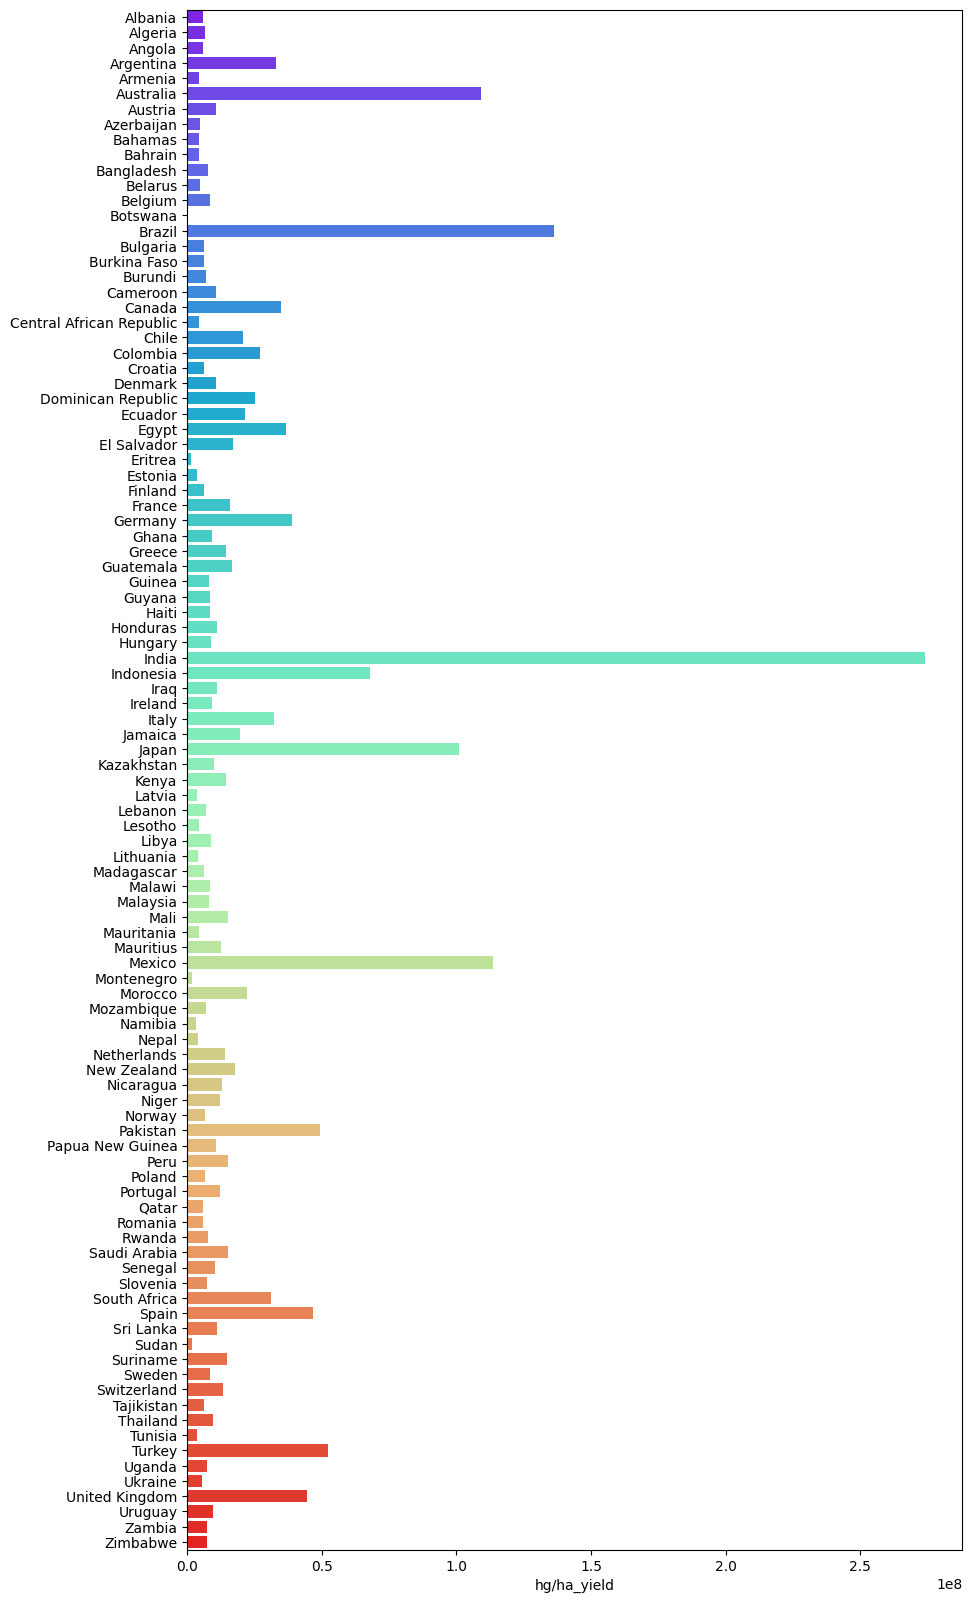

In [ ]:
plt.figure(figsize=(10,20))
sns.barplot(x=total_yield_area_wise, y=county,palette='rainbow')

**Crop Wise Yeild**

In [ ]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<ipython-input-108-0d26e51c8d72>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crops,x=yield_per_crop,palette='dark')


<Axes: >

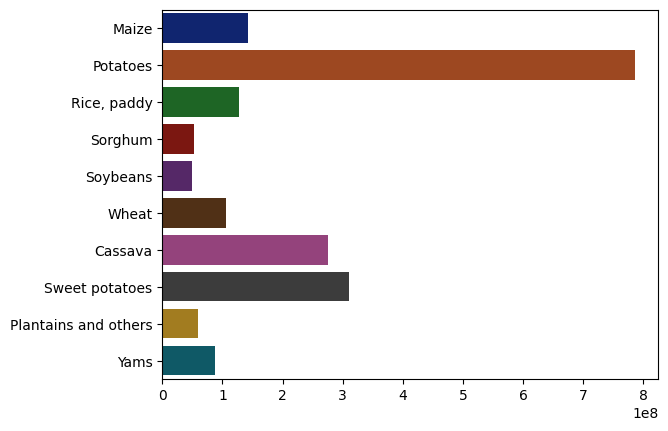

In [ ]:
sns.barplot(y=crops,x=yield_per_crop,palette='dark')

**Train Test split"**

In [ ]:
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(20745, 6)

In [ ]:
X_train

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
24234,Saudi Arabia,Sorghum,2000,59.0,3024.11,26.55
9468,Greece,Sweet potatoes,2012,652.0,8002.20,18.82
6793,Colombia,Maize,2006,3240.0,98328.63,27.51
28212,Zimbabwe,Potatoes,2010,657.0,3305.17,21.17
7358,Dominican Republic,Sweet potatoes,2007,1410.0,5689.80,27.08
...,...,...,...,...,...,...
23678,Portugal,Sweet potatoes,2004,854.0,16942.00,16.31
5960,Canada,Wheat,2006,537.0,36572.75,7.85
860,Australia,Potatoes,1991,534.0,17866.00,18.73
17223,Kazakhstan,Potatoes,1998,250.0,6416.14,6.94


**Converting Categorical to Numerical and Scaling the values**

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehotencoder',ohe, [0,1]),
        ('standardization',scaler,[2,3,4,5])
    ],
    remainder='passthrough'
)

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [0, 1]),
                                ('standardization', StandardScaler(),
                                 [2, 3, 4, 5])])

In [ ]:
X_train_new = preprocessor.fit_transform(X_train)
X_test_new = preprocessor.transform(X_test)

In [ ]:
X_train_new

<20745x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122877 stored elements in Compressed Sparse Row format>

**Training Model**

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'SVR':SVR(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'KNeighborsRegressor':KNeighborsRegressor()
}

for name,mod in models.items():
  mod.fit(X_train_new,y_train)
  y_pred=mod.predict(X_test_new)
  print(f"{name}  MSE : {mean_absolute_error(y_test,y_pred)}  Score {r2_score(y_test,y_pred)}")

LinearRegression  MSE : 29920.761340711597  Score 0.7486566530283931


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910887.43359, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso  MSE : 29907.604370717872  Score 0.7485842229351424
Ridge  MSE : 29875.000895927205  Score 0.7485397180960003
SVR  MSE : 57978.68716067787  Score -0.2099498636919488
DecisionTreeRegressor  MSE : 4154.627723154039  Score 0.9767999825811537
KNeighborsRegressor  MSE : 4854.222325043377  Score 0.9824139991265859


**Select model**

In [ ]:
## Decision tree MSE is less and Score is good so choosing Decision Tree
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train_new,y_train)
dtr_model.predict(X_test_new)

array([160124.,  15838.,  72614., ...,  52692.,   9621., 132600.])

**Predictive System**

In [ ]:
def predict(Area,	Item,	Year	,average_rain_fall_mm_per_year,	pesticides_tonnes,	avg_temp):
  input_data = (Area,	Item,	Year	,average_rain_fall_mm_per_year,	pesticides_tonnes,	avg_temp)
  input_data_as_numpy_array = np.asarray(input_data)
  input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

  transformed_feature = preprocessor.transform(input_data_reshaped)
  prediction = dtr_model.predict(transformed_feature)

  return prediction[0]

In [ ]:
Year = 2000
average_rain_fall_mm_per_year =59.0
pesticides_tonnes = 3024.11
avg_temp = 26.55
Area = 'Saudi Arabia'
Item = 'Sorghum'

result = predict(Area,Item,Year,average_rain_fall_mm_per_year,	pesticides_tonnes,	avg_temp)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(f"Yield : {result:.0f}")

Yield : 13384


**Pickle File**

In [ ]:
import pickle
pickle.dump(dtr_model,open('model.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))